In [46]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
from citipy import citipy
import openweathermapy.core as owm
from config import api_key
import matplotlib.pyplot as plt
import datetime

In [47]:
## Getting the 500 random lat and longitudes
lat=[]
lon=[]
for x in range(1000):
    lat.append(np.random.uniform(90, -90))
    lon.append(np.random.uniform(-180, 180))


In [48]:
cities = []
for i in range(1000):
    city_py=citipy.nearest_city(lat[i], lon[i])
    city=city_py.city_name
    cities.append(city)


In [49]:
city_df=pd.DataFrame({'City':cities,'Latitudes':lat,'Longitude':lon})
city_df.nunique()

City         284
Latitudes    500
Longitude    500
dtype: int64

In [50]:
new_df=city_df.drop_duplicates(subset='City',keep='first')
new_df.nunique()

City         284
Latitudes    284
Longitude    284
dtype: int64

In [51]:
settings={'units':'metric','appid':api_key}
temp=[]
humidity=[]
clouds=[]
speed=[]
data=[]
city=[]

for x in new_df['City']:
    try:
        
        current_info=owm.get_current(x,**settings)
        data.append(current_info)
        city.append(x)
        temp.append(current_info['main']['temp_max'])
        humidity.append(current_info['main']['humidity'])
        speed.append(current_info['wind']['speed'])
        clouds.append(current_info['clouds']['all'])
        
    except:
        
        print('Error with info, skipping')
    

Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping
Error with info, skipping


In [52]:
weather_df=pd.DataFrame({'City':city,'Max Temperature (C)':temp,'Humidity(%)':humidity,
            'Wind Speed (m/s)':speed,'Cloudiness (%)':clouds})

In [53]:
weather_df.nunique()

City                   253
Cloudiness (%)          21
Humidity(%)             60
Max Temperature (C)    175
Wind Speed (m/s)       110
dtype: int64

In [54]:
merge=pd.merge(weather_df,new_df,on='City',how='left')


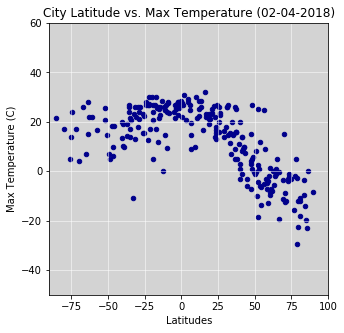

In [57]:
##plot
merge.plot(kind='Scatter',x='Latitudes',y='Max Temperature (C)',linewidths=1,c='darkblue',grid=True,
           legend=None,figsize=(5,5),title='City Latitude vs. Max Temperature ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-50,60)
plt.xlim(-90,100)

plt.savefig("Lat_vs_Max_Temp.png")
plt.show()

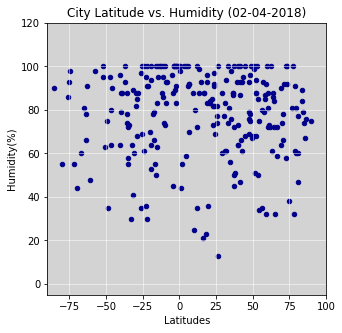

In [58]:
merge.plot(kind='Scatter',x='Latitudes',y='Humidity(%)',linewidths=1,c='darkblue',grid=True,
           legend=None,figsize=(5,5),title='City Latitude vs. Humidity ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-5,120)
plt.xlim(-90,100)

plt.savefig("Lat_vs_Humidity.png")
plt.show()

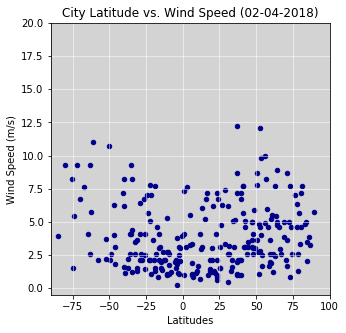

In [59]:
merge.plot(kind='Scatter',x='Latitudes',y='Wind Speed (m/s)',linewidths=1,c='darkblue',grid=True,
           legend=None,figsize=(5,5),title='City Latitude vs. Wind Speed ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-0.5,20)
plt.xlim(-90,100)

plt.savefig("Lat_vs_Wind_Speed.png")
plt.show()


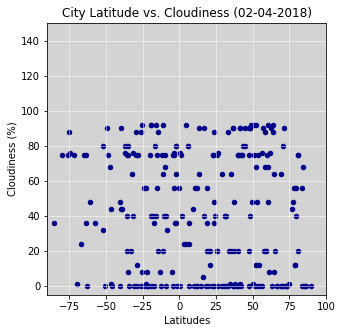

In [60]:
merge.plot(kind='Scatter',x='Latitudes',y='Cloudiness (%)',linewidths=1,c='darkblue',grid=True,
           legend=None,figsize=(5,5),title='City Latitude vs. Cloudiness ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-5,150)
plt.xlim(-90,100)

plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

In [61]:
merge.to_csv("Output/Weather.csv", index=False, header=True)